# 과제: DBSCAN을 활용한 클러스터링 과제



## 과제 1: 초승달 데이터셋 클러스터링

**목표**: 초승달 데이터셋(Make Moons)에서 DBSCAN을 사용해 군집을 생성하고 이상치를 탐지하세요.

### 데이터셋
- **데이터셋**: `make_moons` 데이터셋 (사이킷런 제공).

### 세부 지침
1. `make_moons`를 사용하여 데이터셋을 생성하세요.
   - 데이터 크기: 300.
   - 노이즈: 0.1.
2. DBSCAN의 `eps`와 `min_samples`를 적절히 설정하여 군집화 모델을 학습하세요.
3. 이상치와 군집을 시각화하세요.


DBSCAN 공부 참고 사이트


참고사이트 https://bcho.tistory.com/1205

In [37]:
from sklearn.datasets import make_moons
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

## 데이터 셋 생성 (300개의 데이터, 노이즈 0.1)
dataset = make_moons(n_samples=300, noise=0.1, random_state = 42)
dataset_X = dataset[0] ## x,y좌표를 나타냄
dataset_Y = dataset[1] ## 데이터의 레이블(반달모양의 군집)

df = pd.DataFrame(dataset_X)
df

,0,1
0,0.682988,-0.345203
1,2.040990,-0.131615
2,-0.139752,0.454391
3,0.885748,0.286342
4,1.182459,-0.497711
...,...,...
295,0.385833,-0.156333
296,0.202356,1.103499
297,-0.661774,0.850728
298,1.666161,-0.079847


In [47]:
## DBSCAN(밀도기반군집화) 설정
dbscan = DBSCAN(eps=0.1, min_samples=5) ## eps(군집 반경)를 0.1, min_sample(최소 샘플 수)을 5으로 지정
cluster_labels = dbscan.fit_predict(dataset_X) ## x, y 좌표를 가지고 군집화 실시

## core_point 군집화 된 포인트
core_point = cluster_labels != -1

## noise_point 정의하기(아무 군집에 들어가지 않는 포인트)
noise_point = cluster_labels == -1

print(f"클러스터 값:{(cluster_labels)}") ## 군집화 확인
print(f"클러스터 개수:{len(np.unique(cluster_labels))}") ## 유니크 한 집단 수
print(f"이상치 개수:{np.sum(noise_point)}") ## 이상치 개수

클러스터 값:[ 0 -1 -1  1  0  0  2 13  3  4 -1  5  0 -1  4  0  6  0 -1 -1 11  7  8  8
 -1  5 -1  6  9 19 -1  9 10  1  0  7  3 11 -1 11 11 -1 -1 12 11 -1  0 -1
 13  0  4 -1 -1 12  6 -1 11 11  2 10  0  5 -1  4  4 10 10 19 -1 14 11 16
 -1  2 16 -1 11 11 12  6  9 -1 10  7 11 13 15 11  1  1  2 11 12  0 -1  1
 14 -1 -1 12  0 12 10 14 17  0 -1  1  4 11 16 17 11 -1 -1 15 16  6  2  0
  5 -1  2  4 16 19 -1 16  2 -1 16 15  4 -1 -1 17 -1 14  4 -1 15 16 14 -1
 -1 -1  7 11  1 11 17 15  0 -1 -1 -1  0 12  2 -1 -1  9  1 10 10 16 -1 19
 18  5 11 -1  8  5 -1 -1 16 10 -1 16  2 -1 -1 17 11 17 19  9 11 -1 12 -1
  0 -1  8  1 -1 17 10  0  3 15 10 -1 -1  0  6 16 12 16  7 -1  3 12  8 -1
  5 -1  9 10 -1 -1  0 -1 10 -1 -1 11 -1 -1  5 -1  6 -1  2  1  5 11 17  0
 -1 -1 -1  5  0 16  2  0  8  3 13  5 16  3 16 11  5 11  2 10 -1  5 -1  1
 11  9 -1 16 -1  0 -1  5 -1 14 -1  2  9 12  5 -1  8 -1  9 -1  2 -1 16 16
 -1 13 11  0 -1 -1 -1  2 12 13 17 11]
클러스터 개수:21
이상치 개수:86


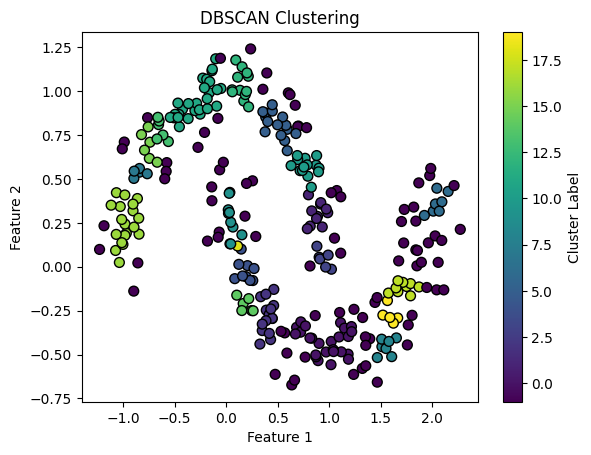

In [44]:
# 군집화 결과 시각화
plt.scatter(dataset_X[:, 0], dataset_X[:, 1], c=cluster_labels, edgecolor="k", s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()

## 과제 2: 실제 데이터셋에서 이상치 탐지

**목표**: 와인 품질 데이터셋에서 DBSCAN을 사용하여 이상치를 탐지하세요.

### 데이터셋
- **데이터셋**: `Wine Quality` 데이터셋 (UCI 머신러닝 리포지토리 또는 `sklearn.datasets`).

### 세부 지침
1. 데이터셋의 특성을 스케일링하세요 (e.g., `StandardScaler`).
2. DBSCAN의 적절한 `eps`와 `min_samples` 값을 설정하여 이상치를 탐지하세요.
3. 이상치 비율과 클러스터의 개수를 출력하세요.


load_wine 데이터 셋 이해를 위한 사이트

https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_wine.html


In [56]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

## 데이터 셋 로드
dataset = load_wine()

## 와인에 대한 데이터
dataset_X = dataset.data

## 와인데이터를 행, 와인 특징을 열로 지정해 데이터 프레임 생성
df = pd.DataFrame(dataset_X, columns=dataset.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [61]:
## 데이터 셋 스케일링
scaler = StandardScaler()
scaled_dataset_X = scaler.fit_transform(dataset_X)
scaled_df = pd.DataFrame(scaled_dataset_X, columns=dataset.feature_names)
scaled_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [72]:
## DBSCAN을 이용해 군집화
dbscan = DBSCAN(eps= 3, min_samples= 3)
cluster_labels = dbscan.fit_predict(scaled_dataset_X)
## 군집화된 포인트
core_point = cluster_labels != -1

## 이상치 포인트
noise_point = cluster_labels == -1

print(f"클러스터 값:{(cluster_labels)}")
print(f"클러스터 개수:{len(np.unique(cluster_labels))}")
print(f"이상치 개수:{np.sum(noise_point)}")

클러스터 값:[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  1  0  0
  0 -1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0]
클러스터 개수:3
이상치 개수:7


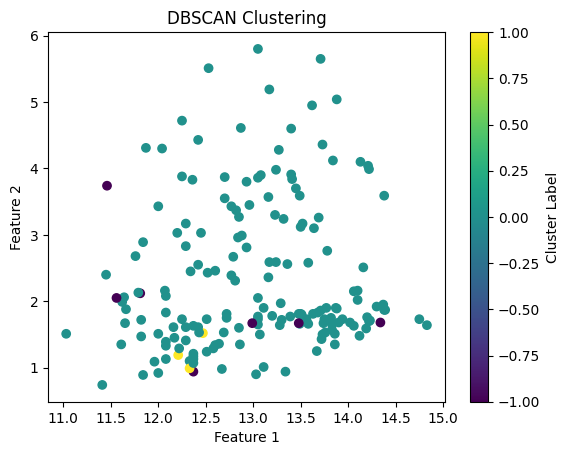

In [73]:
# 군집화 결과 시각화
plt.scatter(dataset_X[:, 0], dataset_X[:, 1], c=cluster_labels)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()